# Question

Perform clustering (K means clustering ) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (10,5)
from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.dpi'] = (200)
sns.set_theme(style='darkgrid')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/yashvardhanpatil/Assignment-Dataset/main/Clustering/EastWestAirlines1.csv',index_col=0)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [3]:
df.rename(columns={'Award?':'Award'},inplace=True)

In [4]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


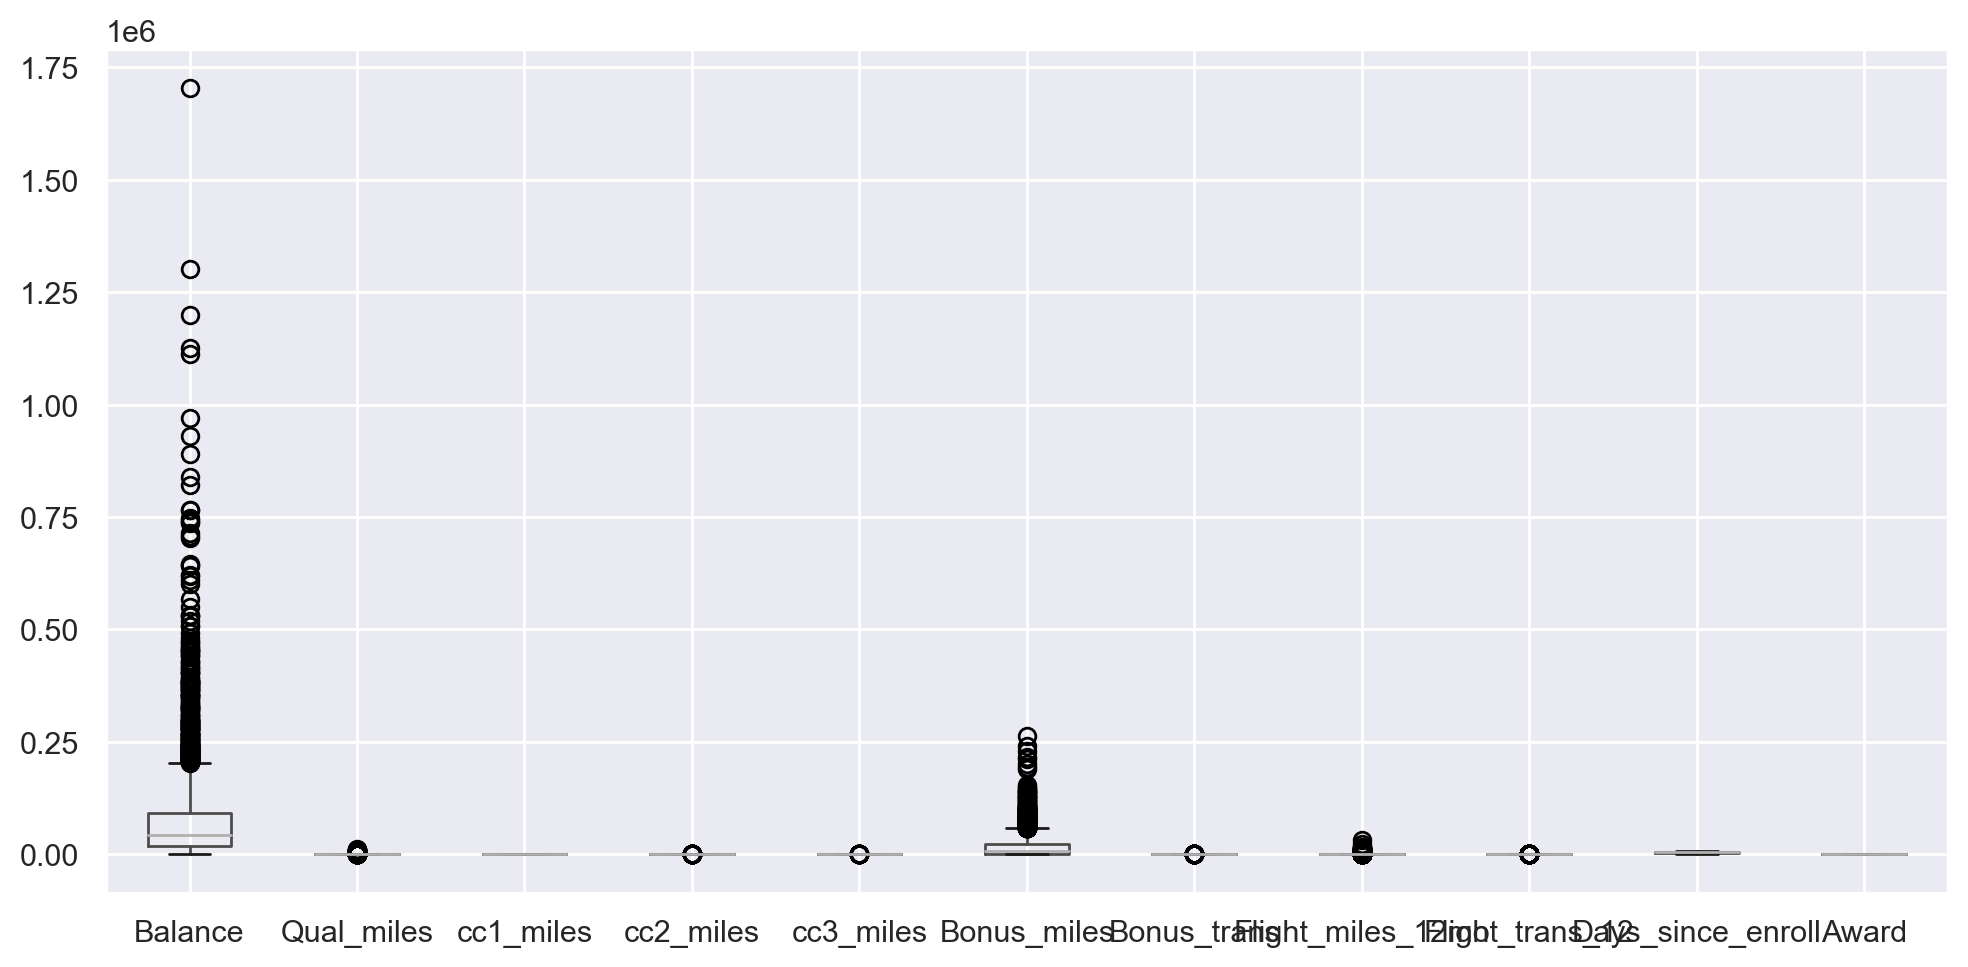

In [5]:
df.boxplot()
plt.tight_layout()

In [6]:
# Removing Outliers

In [7]:
def outlier_detection(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    upper = q3 +(1.5*iqr)
    lower =q1 + (1.5*iqr)
    
    return upper,lower

In [8]:
outlier_detection(df,'Balance')

(203218.75, 129342.25)

In [9]:
outlier_detection(df,'Bonus_miles')

(57626.25, 35075.75)

In [10]:
outlier_detection(df,'Flight_trans_12')

(2.5, 1.5)

In [11]:
outlier_detection(df,'Bonus_trans')

(38.0, 24.0)

In [12]:
outlier_detection(df,'Qual_miles')

(0.0, 0.0)

In [13]:
outlier_detection(df,'cc3_miles')

(1.0, 1.0)

In [14]:
outlier_detection(df,'cc2_miles')

(1.0, 1.0)

In [15]:
df.loc[df['Flight_miles_12mo']>466.5,'Flight_miles_12mo'] = 466.5

In [16]:
df.loc[df['Balance']>129342.25,'Balance'] =129342.25

In [17]:
df.loc[df['Bonus_miles']>35075.75,'Bonus_miles'] =35075.75

In [18]:
df.loc[df['Flight_trans_12']>1.5,'Flight_trans_12'] = 1.5

In [19]:
df.loc[df['Bonus_trans']>24.0,'Bonus_trans'] = 24.0

In [20]:
df.loc[df['Qual_miles']>0.0,'Qual_miles'] = 0.0

In [21]:
df.loc[df['cc3_miles']>1.0,'cc3_miles'] = 1.0

In [22]:
df.loc[df['cc2_miles']>1.0,'cc2_miles'] = 1.0

<AxesSubplot:>

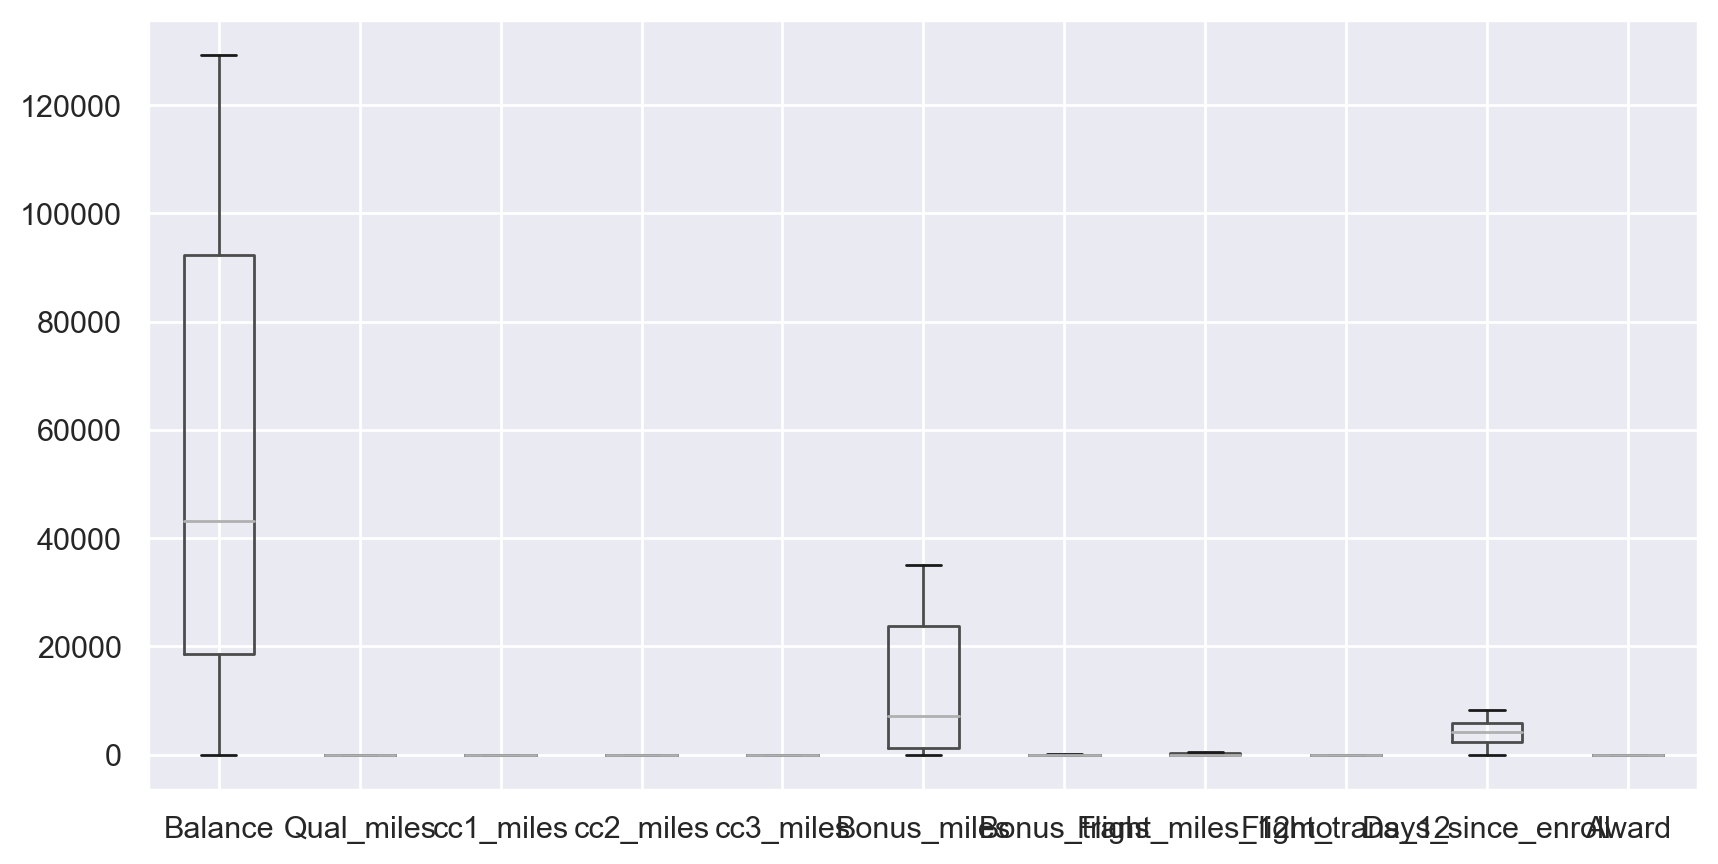

In [23]:
df.boxplot()


In [24]:
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [25]:
from sklearn.preprocessing import normalize

In [26]:
df_norm=pd.DataFrame(normalize(df),columns=df.columns)

In [27]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.939139,0.0,0.000038,0.000010,0.000010,0.336985,0.000231,0.004482,0.000014,0.066627,0.000010
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999597,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.008494,0.000018,0.025509,0.000000


# Hierarchy Cluster

In [28]:
from scipy.cluster import hierarchy as sch

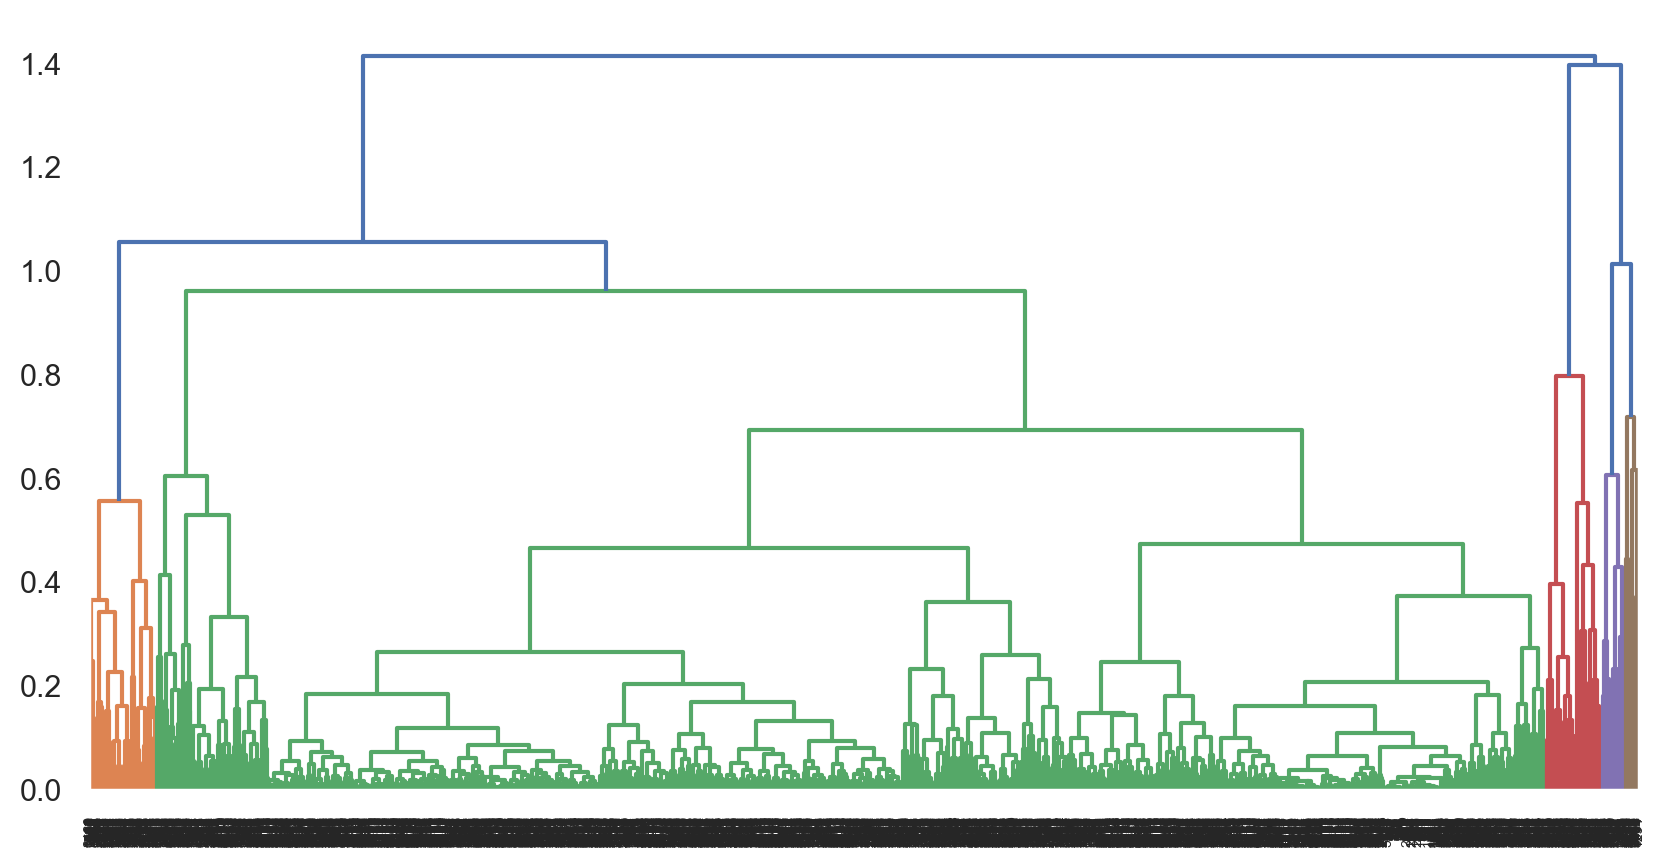

In [29]:
lk = sch.linkage(df_norm,method='complete')
dendro = sch.dendrogram(lk)
plt.axhline(y=6.5,c='red',linestyle = '--')
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering

In [31]:
agg = AgglomerativeClustering(n_clusters=4)
agg

y = agg.fit_predict(df_norm)

In [32]:
df['Clusters'] = y

In [33]:
df 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
ID#,,,,,,,,,,,,
1,28143.0,0,1,1,1,174.00,1,0.0,0.0,7000,0,3
2,19244.0,0,1,1,1,215.00,2,0.0,0.0,6968,0,0
3,41354.0,0,1,1,1,4123.00,4,0.0,0.0,7034,0,3
4,14776.0,0,1,1,1,500.00,1,0.0,0.0,6952,0,0
5,97752.0,0,4,1,1,35075.75,24,466.5,1.5,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476.0,0,1,1,1,8525.00,4,200.0,1.0,1403,1,2
4018,64385.0,0,1,1,1,981.00,5,0.0,0.0,1395,1,3
4019,73597.0,0,3,1,1,25447.00,8,0.0,0.0,1402,1,2


In [34]:
df['Clusters'].value_counts()

2    1623
3    1389
1     554
0     433
Name: Clusters, dtype: int64

In [35]:
df.groupby('Clusters').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Clusters,,,,,,,,,,,
0,8700.242494,0.0,1.009238,1.0,1.0,865.249423,3.016166,39.065820,0.140878,4895.429561,0.187067
1,29197.907942,0.0,3.081227,1.0,1.0,25159.070397,15.415162,132.228339,0.435018,3985.088448,0.765343
2,78714.029113,0.0,2.833025,1.0,1.0,20721.353974,15.833025,148.875847,0.487677,4242.096734,0.423290
3,55479.714003,0.0,1.075594,1.0,1.0,2618.106551,5.652988,124.351692,0.421886,3785.267099,0.208063


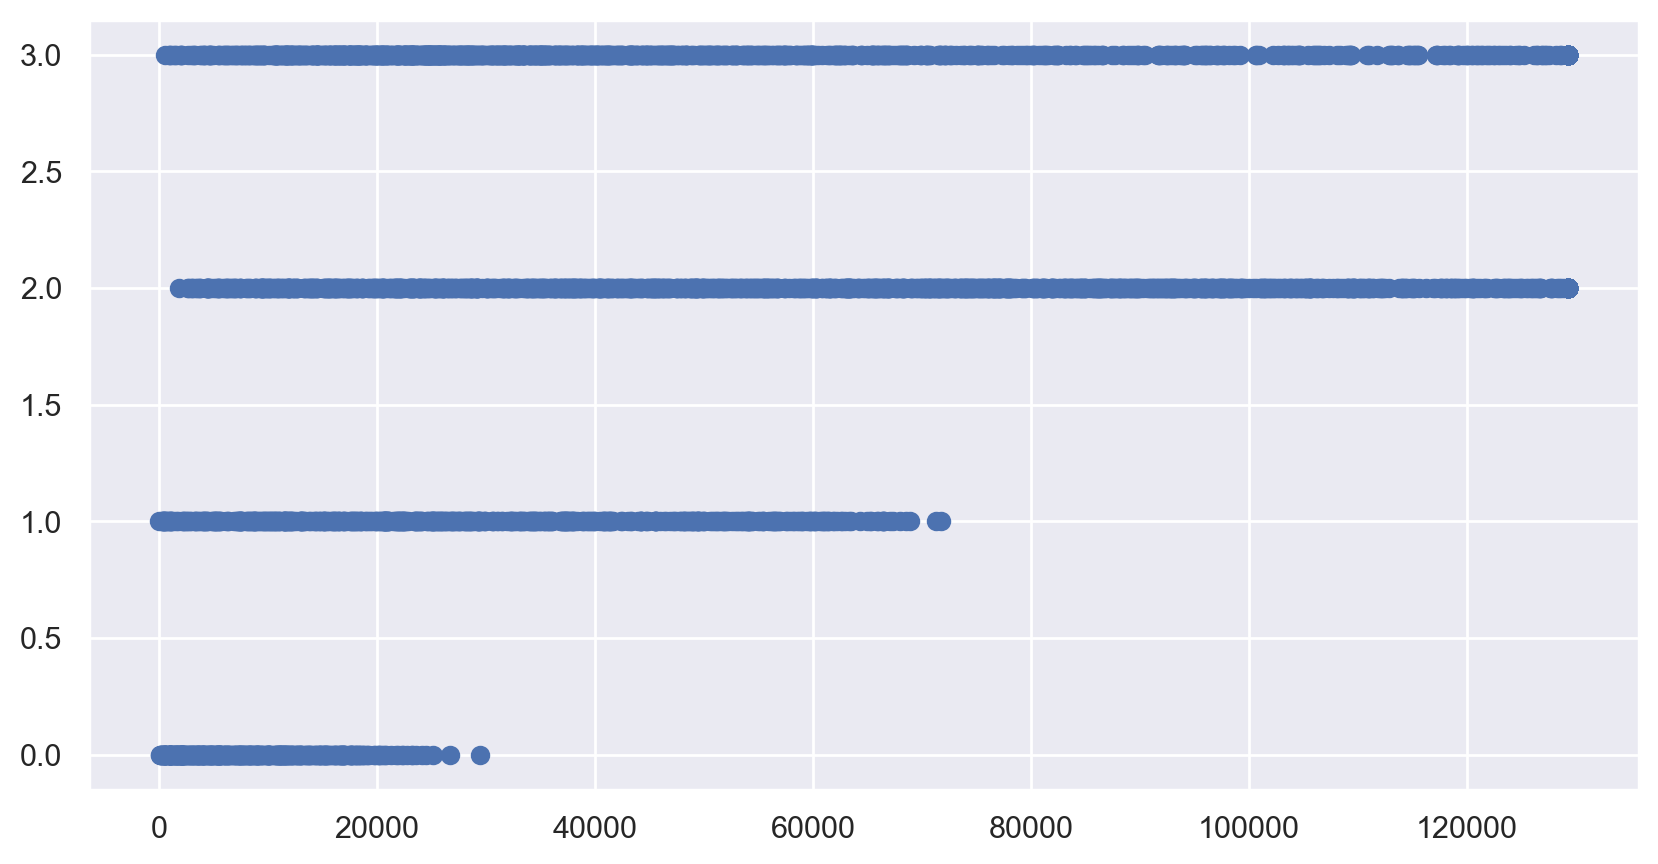

In [36]:
plt.scatter(df['Balance'],df['Clusters'])
plt.show()
plt.rcParams['figure.figsize']=(15,10)

# KMEANS

In [37]:
from sklearn.cluster import KMeans

In [38]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-0.64220241,  0.        , -0.76957841, ...,  1.39545434,
        -0.7669193 ,  1.05127145],
       [-0.84586942,  0.        , -0.76957841, ...,  1.37995704,
        -0.7669193 , -2.0782828 ],
       [-0.33984881,  0.        , -0.76957841, ...,  1.41192021,
        -0.7669193 ,  1.05127145],
       ...,
       [ 0.39808075,  0.        ,  0.68312117, ..., -1.31560393,
         1.30391816,  0.0080867 ],
       [-0.0298511 ,  0.        , -0.76957841, ..., -1.31608822,
        -0.7669193 ,  1.05127145],
       [-1.21727161,  0.        , -0.76957841, ..., -1.31754109,
        -0.7669193 , -2.0782828 ]])

In [39]:
df_sc = pd.DataFrame(x,columns=df.columns)

In [40]:
df_sc

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,-0.642202,0.0,-0.769578,0.0,0.0,-0.967612,-1.263079,-0.637878,-0.668281,1.395454,-0.766919,1.051271
1,-0.845869,0.0,-0.769578,0.0,0.0,-0.964495,-1.134867,-0.637878,-0.668281,1.379957,-0.766919,-2.078283
2,-0.339849,0.0,-0.769578,0.0,0.0,-0.667312,-0.878442,-0.637878,-0.668281,1.411920,-0.766919,1.051271
3,-0.948126,0.0,-0.769578,0.0,0.0,-0.942822,-1.263079,-0.637878,-0.668281,1.372208,-0.766919,-2.078283
4,0.950904,0.0,1.409471,0.0,0.0,1.686483,1.685805,1.720766,1.718551,1.363975,1.303918,0.008087
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.863446,0.0,-0.769578,0.0,0.0,-0.332563,-0.878442,0.373330,0.922940,-1.315120,1.303918,0.008087
3995,0.187250,0.0,-0.769578,0.0,0.0,-0.906244,-0.750230,-0.637878,-0.668281,-1.318994,1.303918,1.051271
3996,0.398081,0.0,0.683121,0.0,0.0,0.954267,-0.365593,-0.637878,-0.668281,-1.315604,1.303918,0.008087
3997,-0.029851,0.0,-0.769578,0.0,0.0,-0.942822,-1.263079,1.720766,0.922940,-1.316088,-0.766919,1.051271


In [41]:
km = KMeans()
y = km.fit_predict(x)
y

array([2, 0, 2, ..., 6, 5, 0])

In [42]:
df1 = pd.DataFrame(x, columns=df.columns)
df1['cluster'] = y
df1


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters,cluster
0,-0.642202,0.0,-0.769578,0.0,0.0,-0.967612,-1.263079,-0.637878,-0.668281,1.395454,-0.766919,1.051271,2
1,-0.845869,0.0,-0.769578,0.0,0.0,-0.964495,-1.134867,-0.637878,-0.668281,1.379957,-0.766919,-2.078283,0
2,-0.339849,0.0,-0.769578,0.0,0.0,-0.667312,-0.878442,-0.637878,-0.668281,1.411920,-0.766919,1.051271,2
3,-0.948126,0.0,-0.769578,0.0,0.0,-0.942822,-1.263079,-0.637878,-0.668281,1.372208,-0.766919,-2.078283,0
4,0.950904,0.0,1.409471,0.0,0.0,1.686483,1.685805,1.720766,1.718551,1.363975,1.303918,0.008087,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.863446,0.0,-0.769578,0.0,0.0,-0.332563,-0.878442,0.373330,0.922940,-1.315120,1.303918,0.008087,5
3995,0.187250,0.0,-0.769578,0.0,0.0,-0.906244,-0.750230,-0.637878,-0.668281,-1.318994,1.303918,1.051271,4
3996,0.398081,0.0,0.683121,0.0,0.0,0.954267,-0.365593,-0.637878,-0.668281,-1.315604,1.303918,0.008087,6
3997,-0.029851,0.0,-0.769578,0.0,0.0,-0.942822,-1.263079,1.720766,0.922940,-1.316088,-0.766919,1.051271,5


In [43]:
km.cluster_centers_

array([[-1.08943954,  0.        , -0.76957841,  0.        ,  0.        ,
        -0.88258046, -1.02689852, -0.52011974, -0.52263148,  0.31423089,
        -0.42098993, -2.02099119],
       [-0.20725512,  0.        , -0.04322862,  0.        ,  0.        ,
        -0.03164077,  0.55546006, -0.60136838, -0.57427014, -0.56885446,
        -0.7669193 , -0.04441494],
       [ 0.27174391,  0.        , -0.65997157,  0.        ,  0.        ,
        -0.66901851, -0.51286368, -0.6082137 , -0.59302055,  0.72730468,
        -0.30984256,  0.92439763],
       [ 0.85012565,  0.        ,  1.2605125 ,  0.        ,  0.        ,
         1.36656289,  1.22103503,  1.53271941,  1.4714762 ,  0.38248034,
         0.83069944, -0.26085937],
       [-0.68322551,  0.        , -0.76414166,  0.        ,  0.        ,
        -0.87287875, -1.00607867, -0.61117492, -0.60396519, -0.95553828,
        -0.57161577,  0.85606473],
       [ 0.20616722,  0.        , -0.6916696 ,  0.        ,  0.        ,
        -0.50824869, -

# Elbow Graph


In [44]:
wcss=[]

for i in range (1,21):
    km= KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [45]:
wcss

[35990.99999999999,
 25696.802685165992,
 21022.87807283592,
 18016.385131040137,
 15203.113172298737,
 13845.393452999691,
 12820.611890517706,
 12043.738611809562,
 11402.461239125401,
 10687.972374719537,
 10236.278229647987,
 9801.877125470037,
 9338.860607077057,
 9024.535784716902,
 8676.308529433929,
 8378.589922708008,
 8147.312602253859,
 7867.321870411812,
 7604.468300582705,
 7347.7888685232165]

Text(0.5, 1.0, 'Elbow Curve')

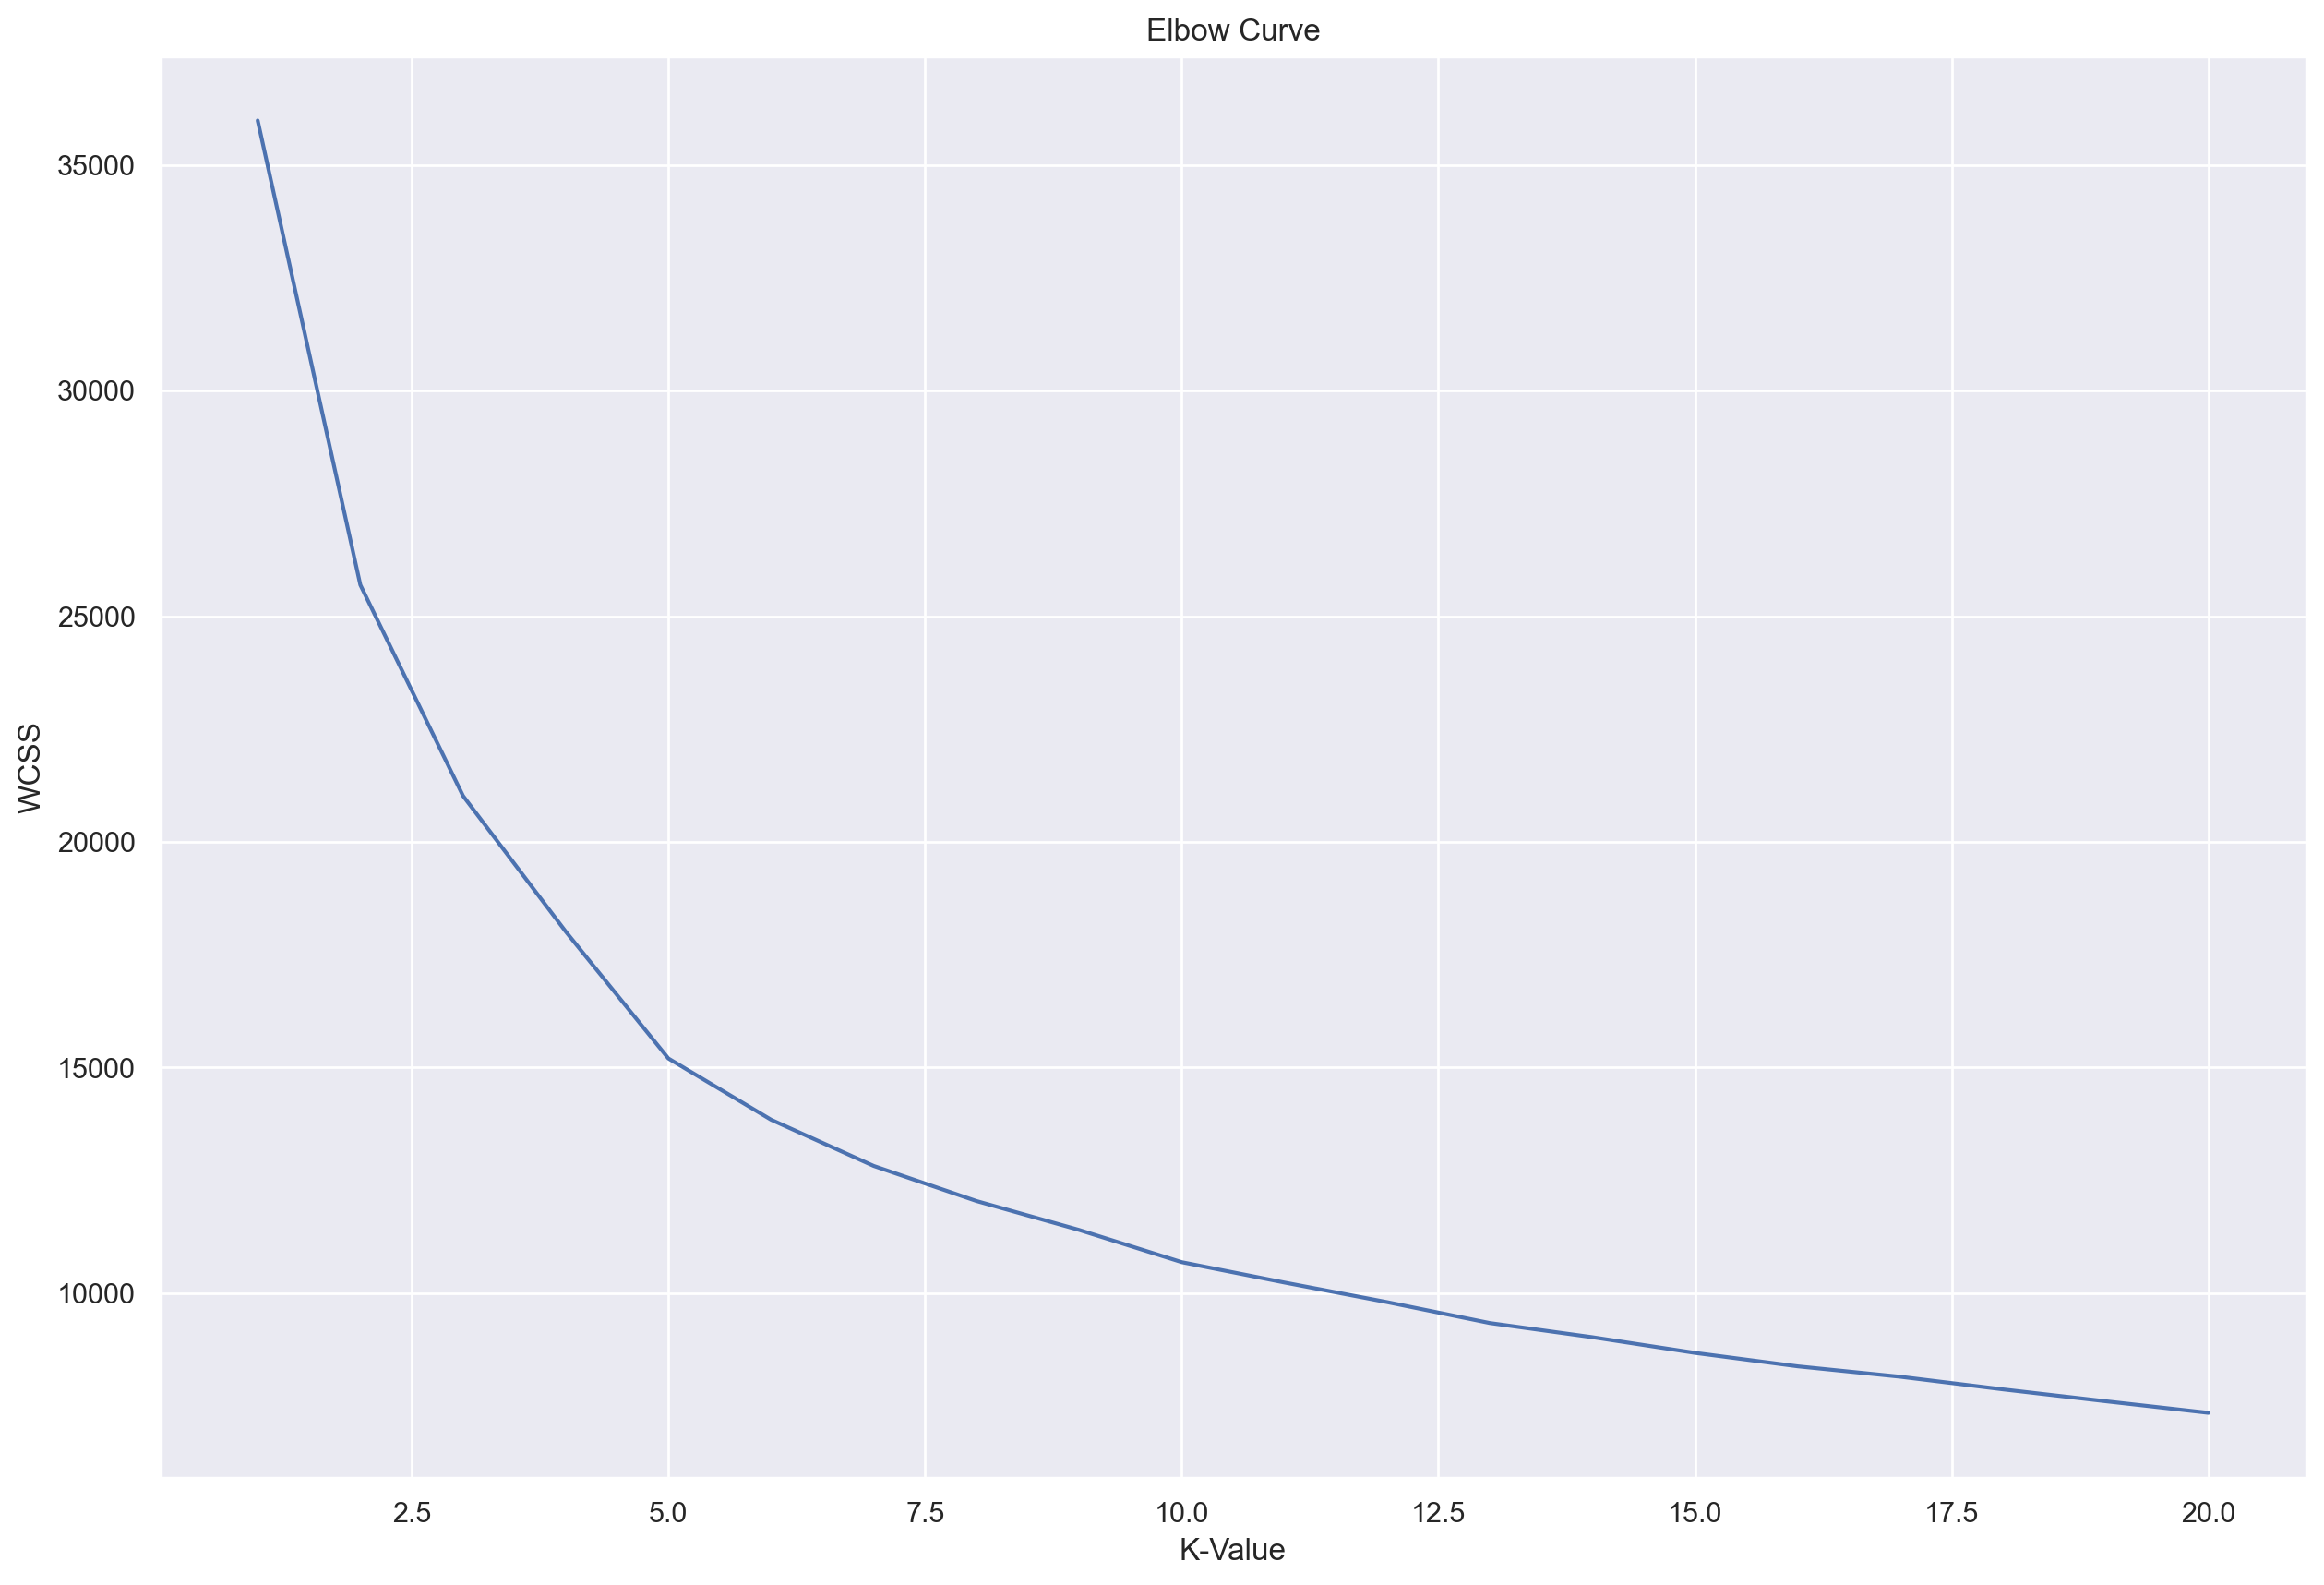

In [46]:
plt.plot(range(1,21), wcss)
plt.xlabel('K-Value')
plt.ylabel('WCSS')
plt.title('Elbow Curve')

# Final model


In [47]:
km= KMeans(n_clusters=5)
y=km.fit_predict(x)
y 

array([2, 3, 2, ..., 1, 4, 3])

In [48]:
df['Cluster']=y
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters,Cluster
ID#,,,,,,,,,,,,,
1,28143.0,0,1,1,1,174.00,1,0.0,0.0,7000,0,3,2
2,19244.0,0,1,1,1,215.00,2,0.0,0.0,6968,0,0,3
3,41354.0,0,1,1,1,4123.00,4,0.0,0.0,7034,0,3,2
4,14776.0,0,1,1,1,500.00,1,0.0,0.0,6952,0,0,3
5,97752.0,0,4,1,1,35075.75,24,466.5,1.5,6935,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476.0,0,1,1,1,8525.00,4,200.0,1.0,1403,1,2,4
4018,64385.0,0,1,1,1,981.00,5,0.0,0.0,1395,1,3,2
4019,73597.0,0,3,1,1,25447.00,8,0.0,0.0,1402,1,2,1


In [49]:
df.groupby('Cluster').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
Cluster,,,,,,,,,,,,
0,92975.034644,0.0,3.773408,1.0,1.0,30753.332865,20.264045,419.588951,1.334270,4904.664794,0.775281,1.735955
1,75405.952008,0.0,3.451518,1.0,1.0,25178.008325,16.094025,4.211557,0.040157,4628.850147,0.498531,1.740451
2,39977.070941,0.0,1.122155,1.0,1.0,3240.735015,6.531108,2.824734,0.027314,3297.756449,0.128225,2.711684
3,8935.513078,0.0,1.032193,1.0,1.0,2682.669517,3.553320,21.819920,0.086519,4570.631791,0.209256,0.156942
4,65164.011129,0.0,1.120827,1.0,1.0,6115.236486,9.170111,415.885533,1.346582,3985.572337,0.453100,2.561208


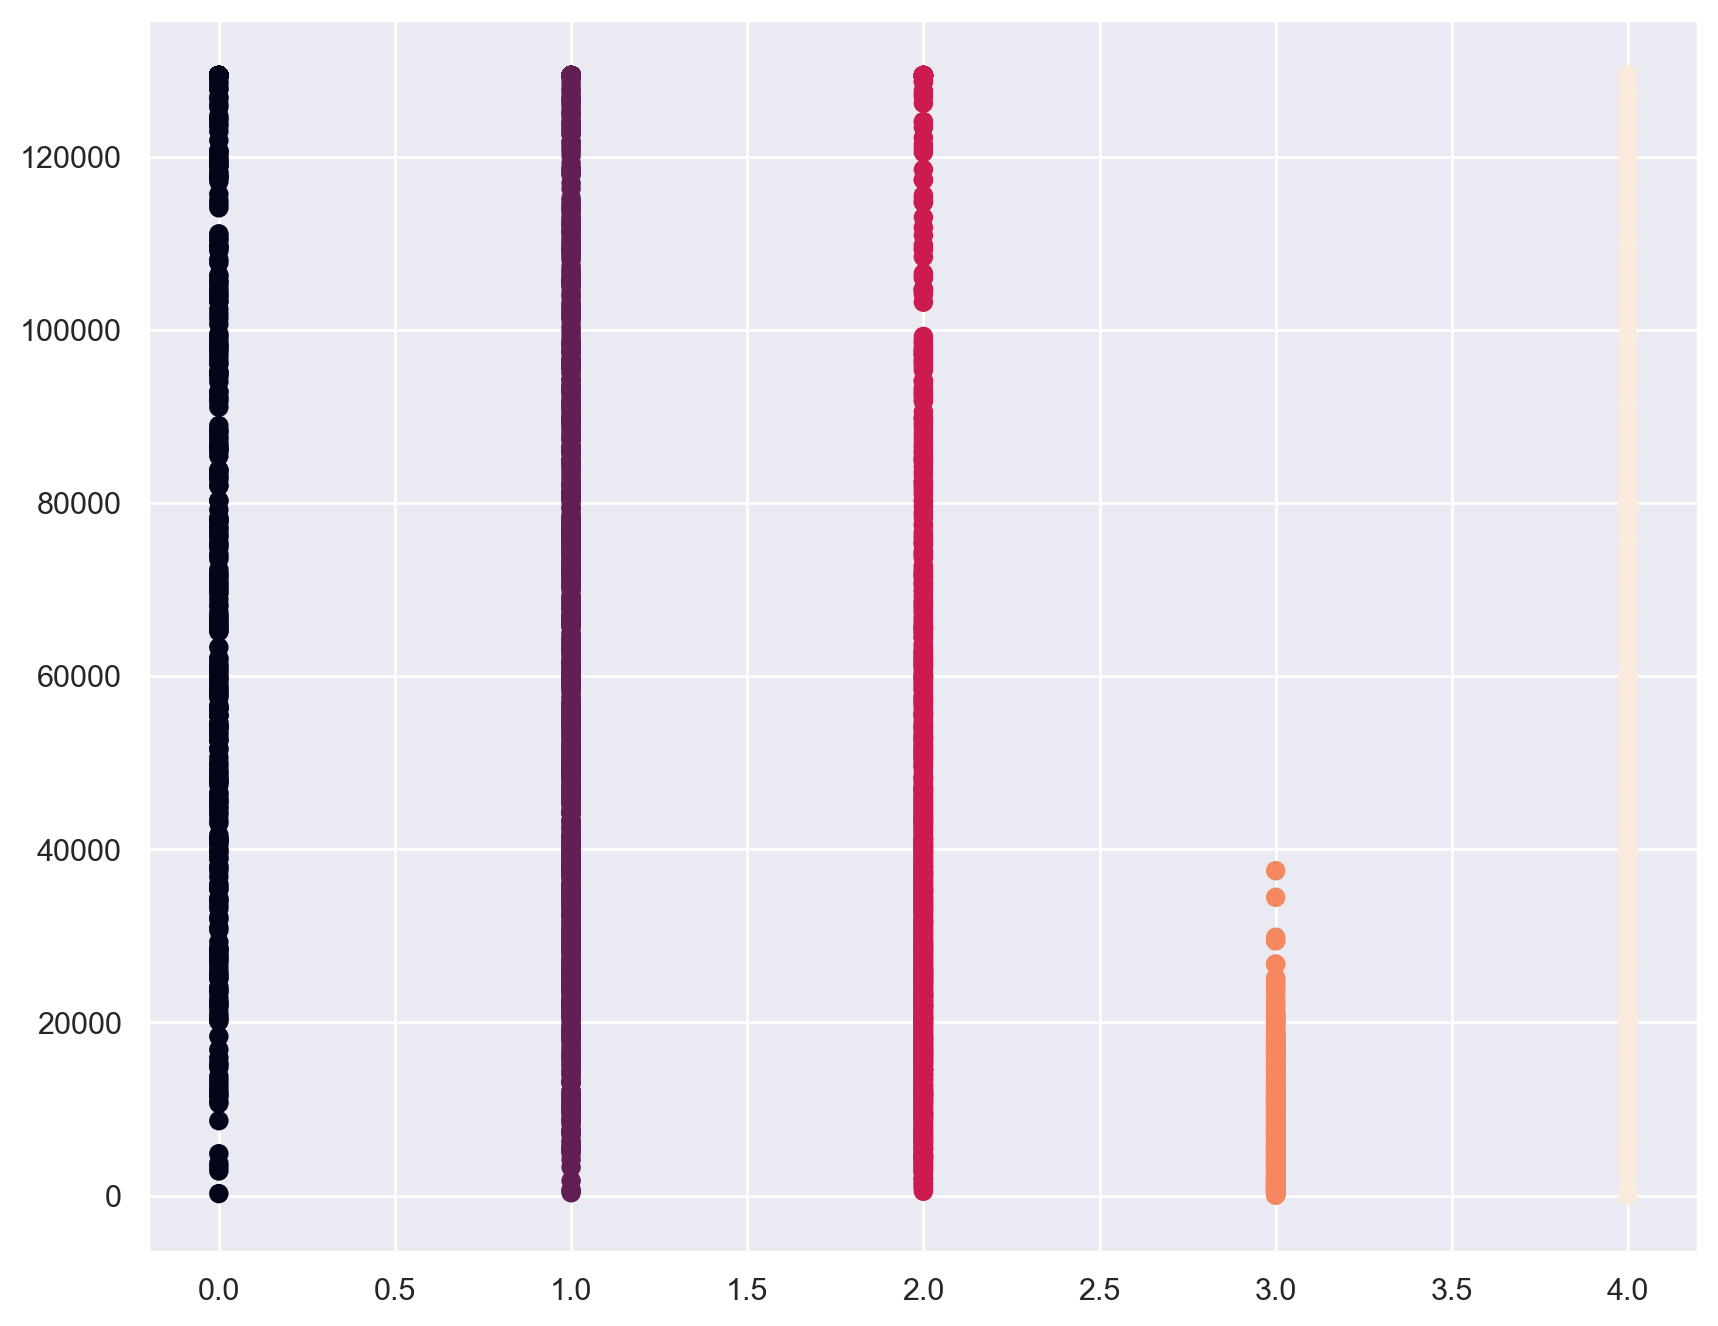

In [50]:
plt.figure(figsize=(10,8))
plt.scatter(df['Cluster'], df['Balance'], c=km.labels_)

# Evaluation of K-Means

In [51]:
from sklearn.metrics import silhouette_score

In [52]:
silhouette_score(x,y)

0.2952180943795337

In [53]:
from yellowbrick.cluster import SilhouetteVisualizer

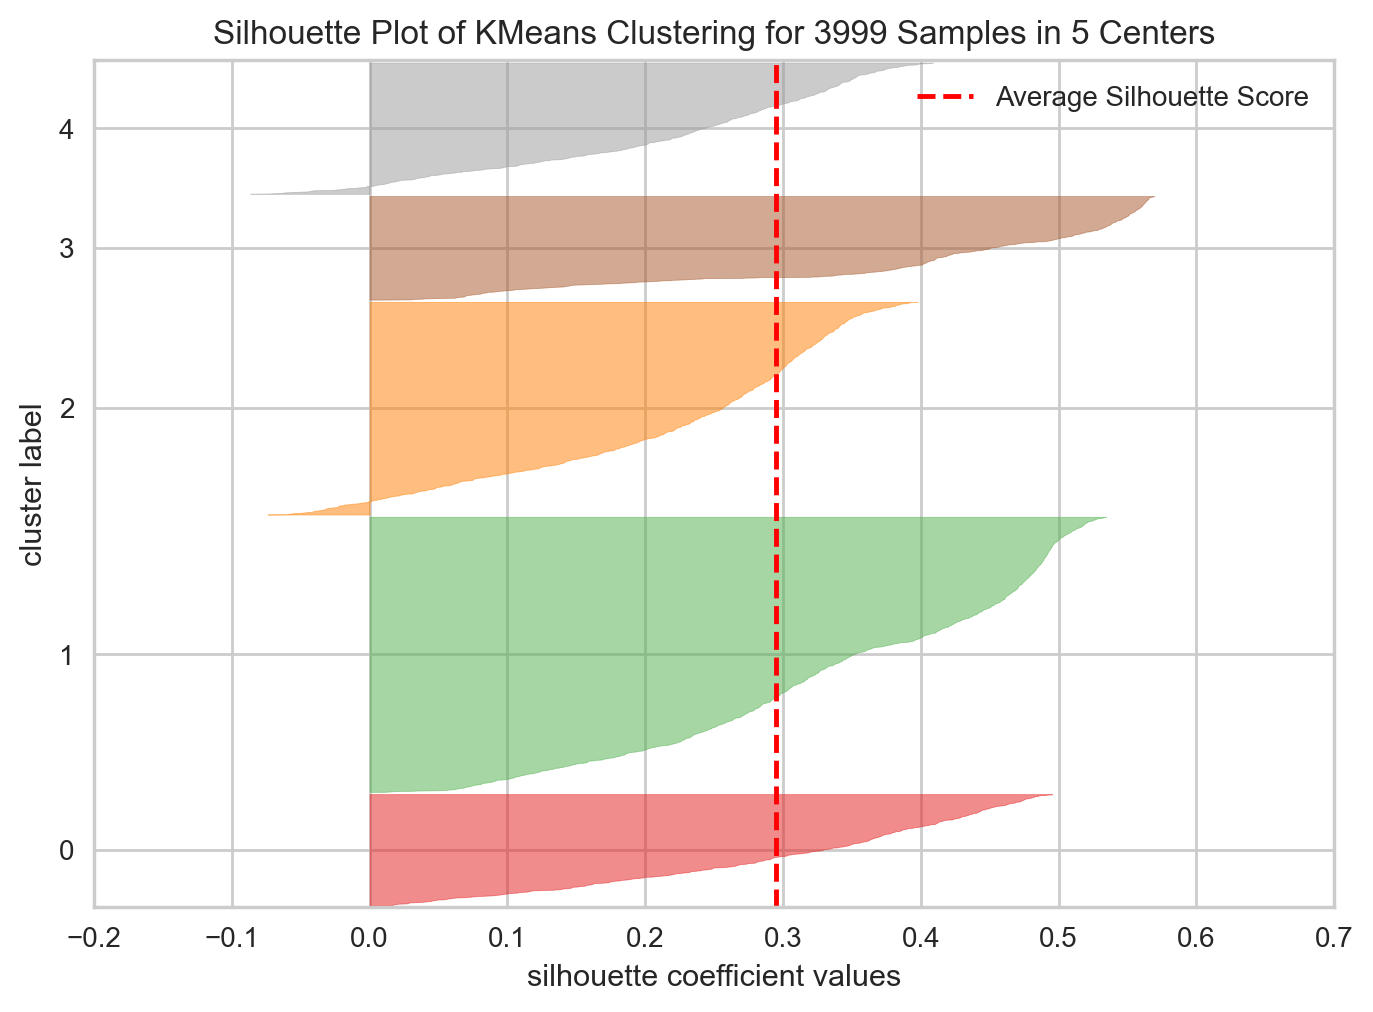

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3999 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [54]:
model = KMeans(n_clusters=5)
vis = SilhouetteVisualizer(model)

vis.fit(x)
vis.show()

# DBscan

In [55]:
from sklearn.cluster import DBSCAN
%matplotlib inline

In [56]:
df = pd.read_csv(r'C:\Users\yashv\Desktop\DS Assignment\clustring\EastWestAirlines1.csv')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [57]:
df.drop(columns='ID#',inplace=True)

In [58]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


<AxesSubplot:>

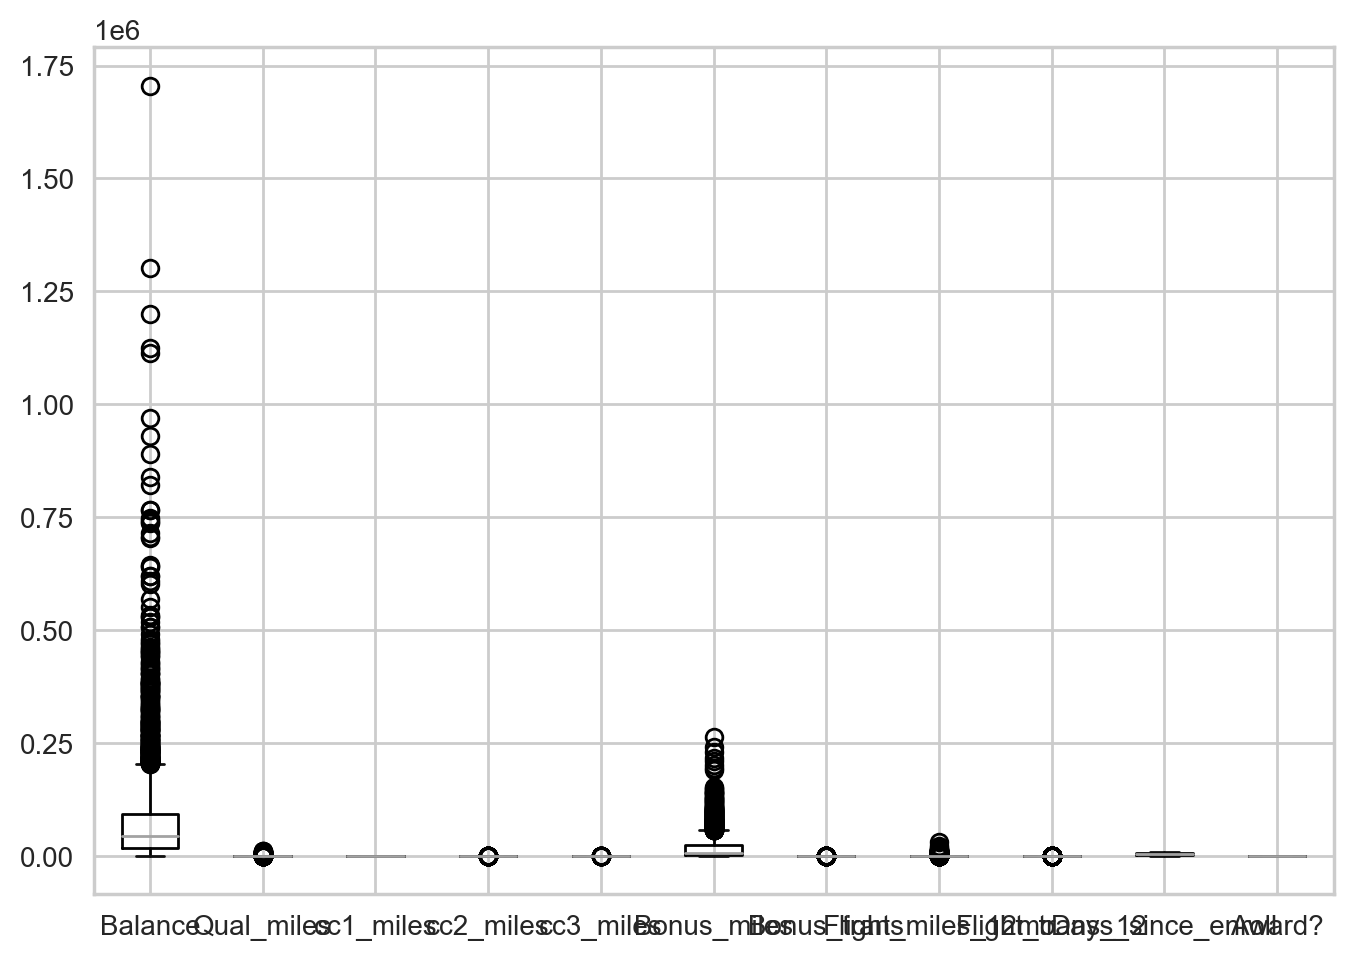

In [59]:
df.boxplot()


In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [62]:
db = DBSCAN(eps=0.5,min_samples=5)
y = db.fit_predict(x)


In [63]:
y

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

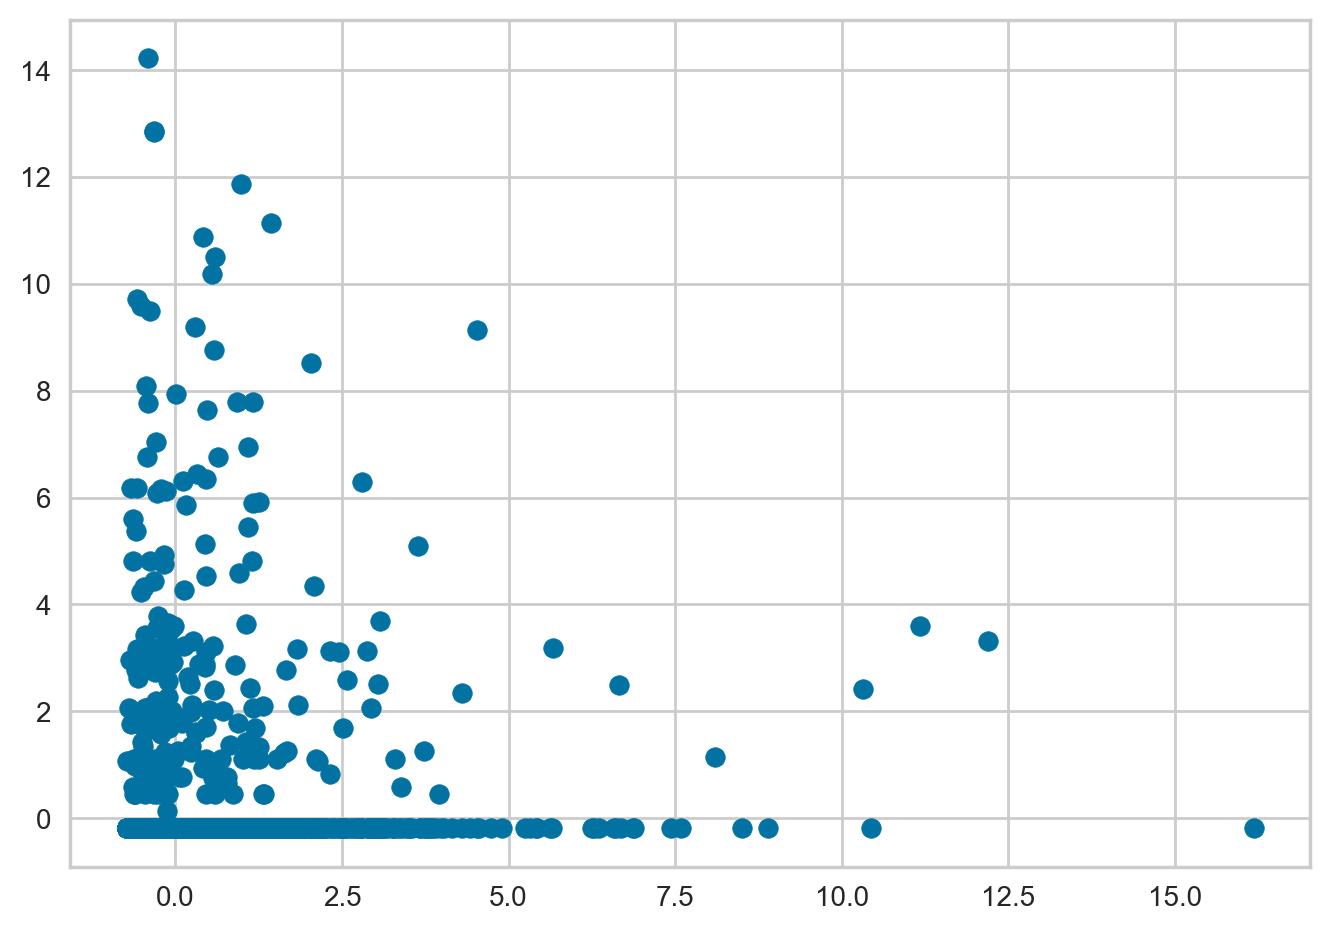

In [64]:
plt.scatter(x[:,0],x[:,1])

In [65]:
from sklearn.neighbors import NearestNeighbors

In [66]:
neigh = NearestNeighbors(n_neighbors=3).fit(x)
d,i = neigh.kneighbors(x)

In [67]:
pd.DataFrame(d)

,0,1,2
0,0.0,0.111847,0.120342
1,0.0,0.114063,0.114376
2,0.0,0.165402,0.194589
3,0.0,0.048375,0.058575
4,0.0,0.545493,0.735055
...,...,...,...
3994,0.0,0.288941,0.335142
3995,0.0,0.312801,0.343099
3996,0.0,0.166148,0.280243
3997,0.0,0.257255,0.271674


In [68]:
dist = np.sort(d[:,1])

Text(0, 0.5, 'Epsilion value')

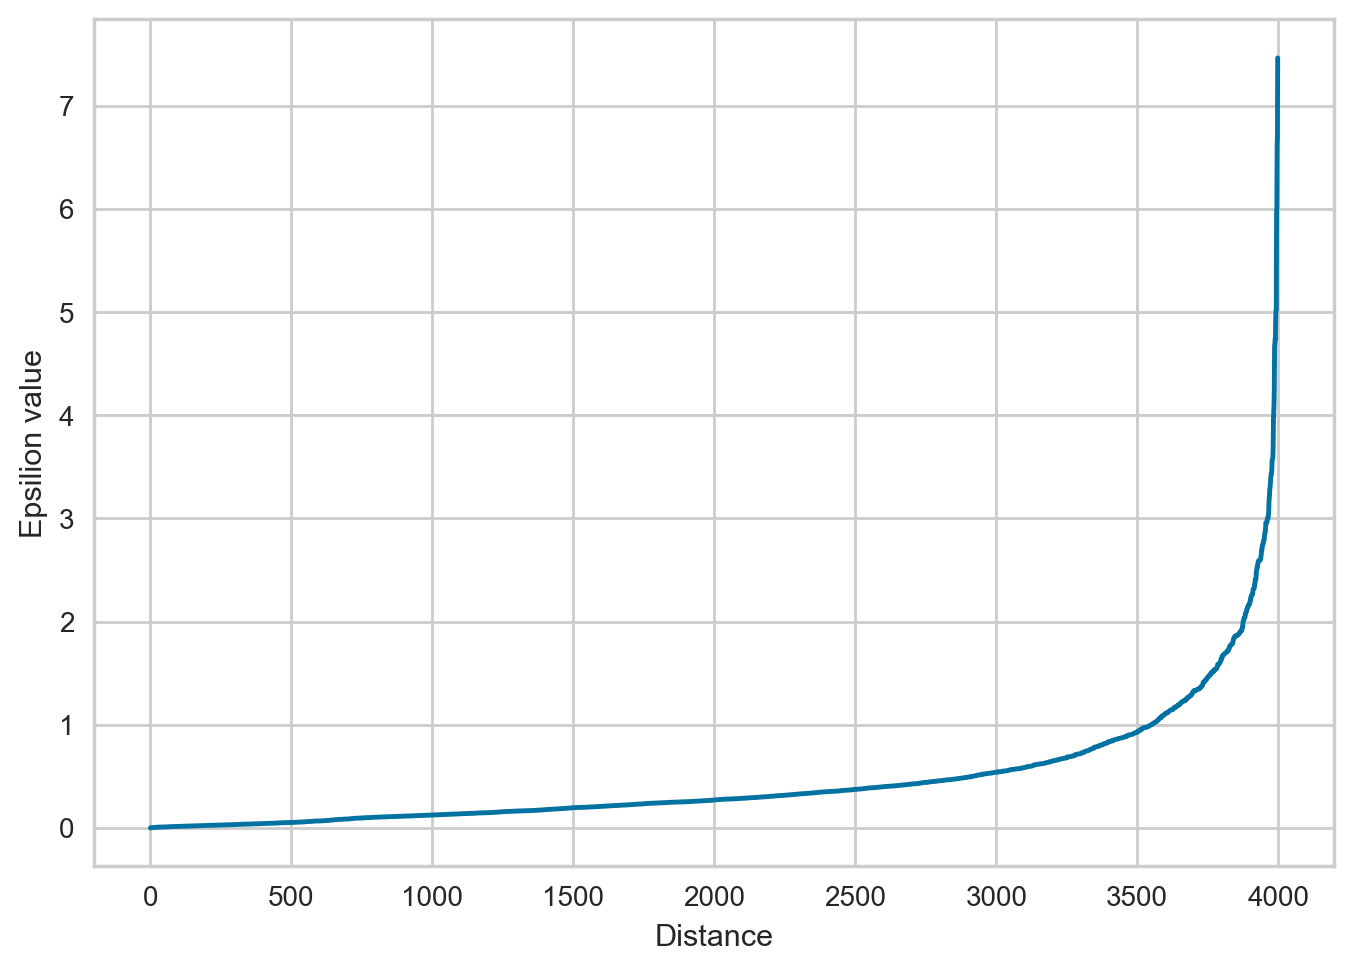

In [69]:
plt.plot(dist)
plt.xlabel('Distance')
plt.ylabel('Epsilion value')

In [70]:
db = DBSCAN(eps=2,min_samples=11)
y = db.fit_predict(x)

In [71]:
df['cluster'] = y

In [72]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [73]:
df['cluster'].value_counts()

 0    2441
 1    1302
-1     240
 2      16
Name: cluster, dtype: int64

In [74]:
cluster_mean = df.groupby('cluster').mean()

In [75]:
cluster_mean

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
-1,225834.029167,1490.650000,2.675000,1.175,1.204167,47893.308333,25.491667,3325.745833,9.670833,4841.904167,0.745833
0,57639.963949,42.606719,1.695617,1.000,1.000000,9774.895535,8.886522,187.523966,0.547726,3812.687014,0.000000
1,75887.015361,87.983871,2.641321,1.000,1.000000,25391.933948,14.109063,445.843318,1.399386,4566.139785,1.000000
2,39218.500000,0.000000,1.000000,2.000,1.000000,9189.250000,13.500000,209.375000,0.812500,3511.187500,0.000000
